# Libraries

In [43]:
import pickle
import pandas as pd
import spacy
from tqdm.notebook import tqdm
import numpy as np
import warnings

from gensim.corpora import Dictionary
from gensim.models.wrappers import LdaMallet
import gensim

import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import seaborn as sns

# Import

In [44]:
N_TOPICS = 50
NOUNS_ONLY = False
N_ITERATIONS = 10000


if NOUNS_ONLY == False:
    NOUNS_ONLY = ""
if NOUNS_ONLY == True:
    NOUNS_ONLY = "_nouns"

In [45]:
lda = LdaMallet.load(f"Models/lda_{N_TOPICS}t_{N_ITERATIONS}i{NOUNS_ONLY}")
top_10 = []
for topic in range(N_TOPICS):
    words = lda.show_topic(topic, 10)
    topic_n_words = ', '.join([word[0] for word in words])
    temp_top_10 = 'Topic {}: {}'.format(str(topic), topic_n_words)
    top_10.append(temp_top_10)
    print(temp_top_10)
topic_columns = ["topic_"+str(i) for i in range(N_TOPICS)]

Topic 0: art, hair, cut, color, design, haircut, artist, paint, piece, inspire
Topic 1: love, family, friend, grateful, thankful, bless, hope, send, heart, pray
Topic 2: life, covid19, pandemic, live, covid_19, coronaviru, stop, save, search, level
Topic 3: night, find, house, leave, light, cool, room, move, spot, point
Topic 4: face, challenge, bottle, hero, shield, soda, recycle, savetheworld, faceshield, SaveTheWorld
Topic 5: case, coronavirus, death, covid-19, number, positive, state, bring, include, report
Topic 6: socialdistance, summer, beach, losangele, sunset, day, water, fire, pool, wave
Topic 7: year, plan, event, pandemic, cancel, wedding, big, happen, hold, suppose
Topic 8: check, link, book, read, visit, appointment, write, website, bio, page
Topic 9: hand, sanitizer, shop, clean, store, wash, buy, supply, stock, shopping
Topic 10: stay, safe, hope, amp, healthy, covid19, ride, foot, remember, strong
Topic 11: corona, 🔥, video, quarantine, music, covid, beat, dance, vibe,

In [46]:
data = pd.read_csv(f"Data/binary_topics_{N_TOPICS}t_{N_ITERATIONS}i{NOUNS_ONLY}.csv")
data["date"] = pd.to_datetime(data["date"])
data.head()

,date,id,tweet,sentiment,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,...,topic_40,topic_41,topic_42,topic_43,topic_44,topic_45,topic_46,topic_47,topic_48,topic_49
0,2020-03-20,1.240728e+18,Many ask us how they can support us during all...,0.136364,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2020-03-20,1.240728e+18,We wish that ceramic coating protected us from...,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2020-03-20,1.240728e+18,I HATE this Koon @Byrdgangshoota 🤦🏾‍♂️😂 Nigga ...,0.275000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-20,1.240729e+18,"Day 3.... Corona-0, QueRona-3! Workout complet...",0.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2020-03-20,1.240729e+18,Staying busy. \n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n...,-0.137879,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Plotting functions

In [53]:
def get_topic_proportion(data, topic, rolling=1):
    topic_proportion = data[["date", topic]].groupby("date", sort=False)[topic].mean()
    rolling_topic_proportion = topic_proportion.rolling(rolling).mean().reset_index(drop=True)
    return rolling_topic_proportion

def get_topic_sentiment_mean(data, topic, rolling=1):
    topic_sentiment_mean = data[data[topic]==1][["date", "sentiment"]].groupby("date", sort=False).mean()
    rolling_topic_sentiment_mean = topic_sentiment_mean.rolling(rolling).mean().reset_index(drop=True)["sentiment"]
    return rolling_topic_sentiment_mean

def get_topic_sentiment_std(data, topic, rolling=1):
    topic_sentiment_std = data[data[topic]==1][["date", "sentiment"]].groupby("date", sort=False).std()
    rolling_topic_sentiment_std = topic_sentiment_std.rolling(rolling).mean().reset_index(drop=True)["sentiment"]
    return rolling_topic_sentiment_std

def get_dates(data, topic):
    date = data[["date", topic]].groupby("date", sort=False)[topic].mean().reset_index()["date"]
    return date

def plot_topic(data, topic, rolling=1, fontsize_y=8):
    topic_proportion = get_topic_proportion(data, topic, rolling)
    topic_sentiment_mean = get_topic_sentiment_mean(data, topic, rolling)
    topic_sentiment_std = get_topic_sentiment_std(data, topic, rolling)
    date = get_dates(data, topic)
    
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15,4))
    fig.suptitle(top_10[int(topic.split("_")[-1])], fontsize=14)
    sns.lineplot(ax=axes[0], 
                 x=date, 
                 y=topic_proportion, 
                 sort=False,
                 ci=None)
    axes[0].set_ylabel("proportion", fontsize=fontsize_y, rotation=90)
    sns.lineplot(ax=axes[1], 
                 x=date, 
                 y=topic_sentiment_mean, 
                 sort=False,
                 color="green",
                 ci=None)
    axes[1].set_ylabel("sentiment mean", fontsize=fontsize_y, rotation=90)
    sns.lineplot(ax=axes[2], 
                 x=date, 
                 y=topic_sentiment_std, 
                 sort=False,
                 color="red",
                 ci=None)
    axes[2].set_ylabel("sentiment std", fontsize=fontsize_y, rotation=90)
    axes[2].set_xlabel(None)
    fig.autofmt_xdate()
    date_format = mpl_dates.DateFormatter("%b-%Y")
    axes[2].xaxis.set_major_formatter(date_format)
    plt.show()

# Plot

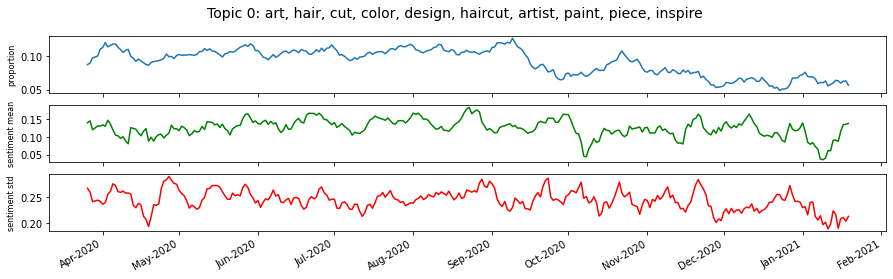

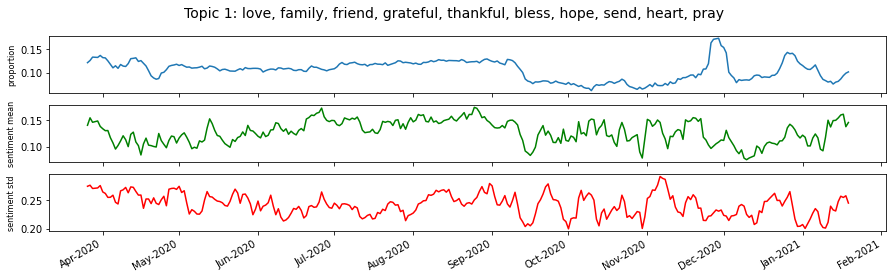

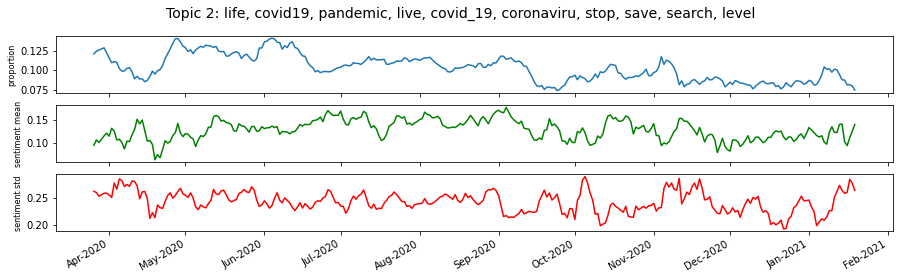

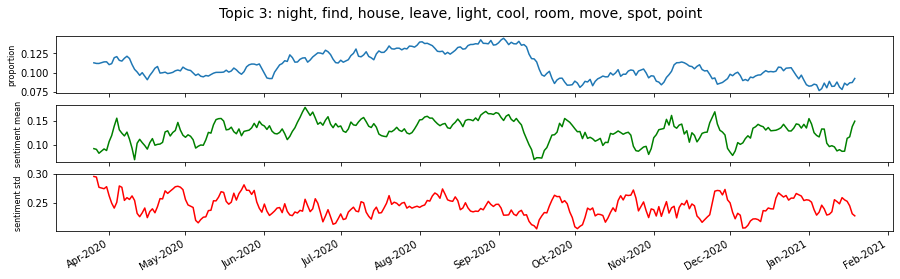

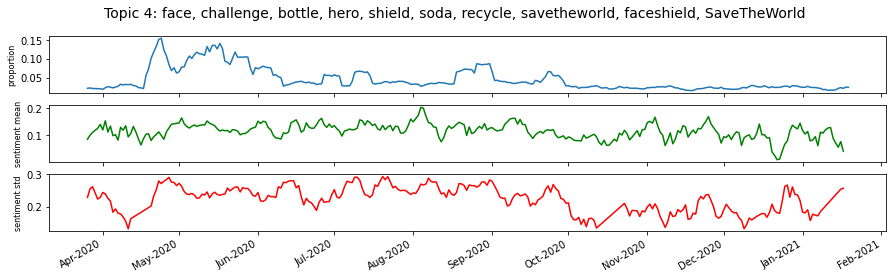

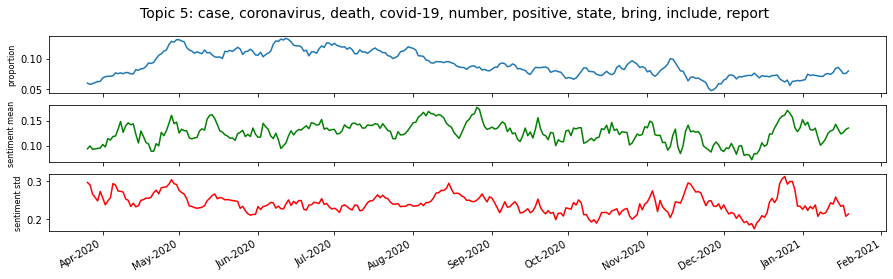

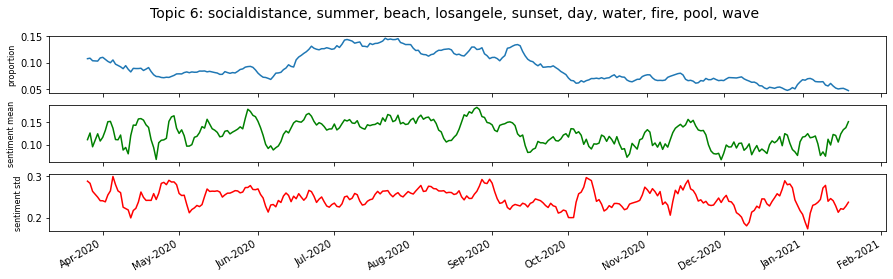

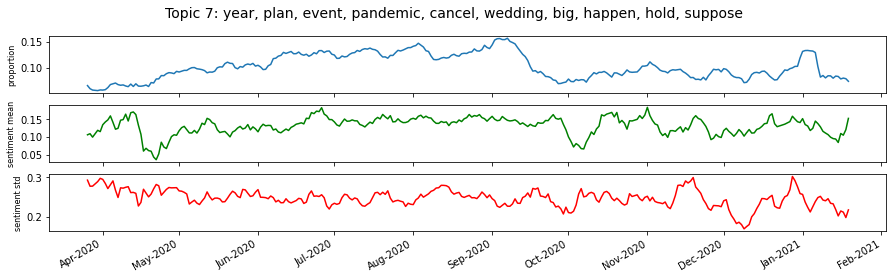

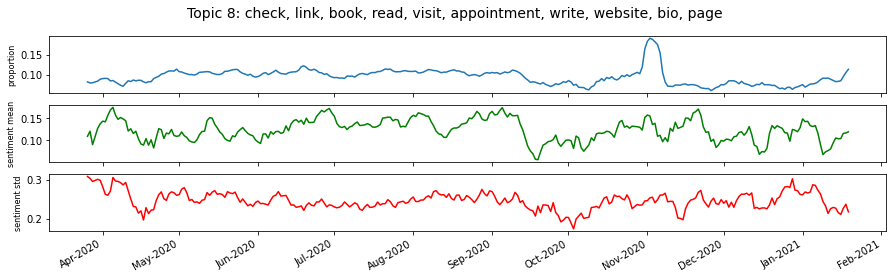

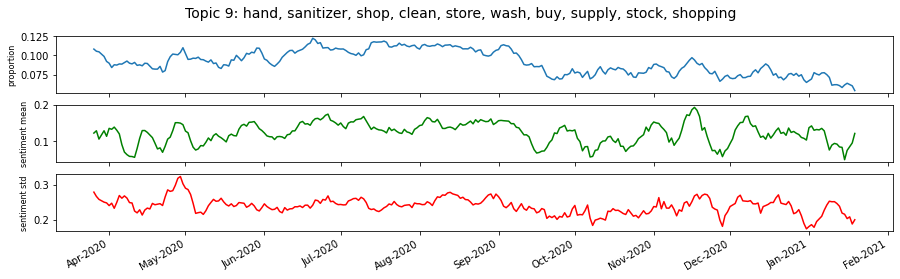

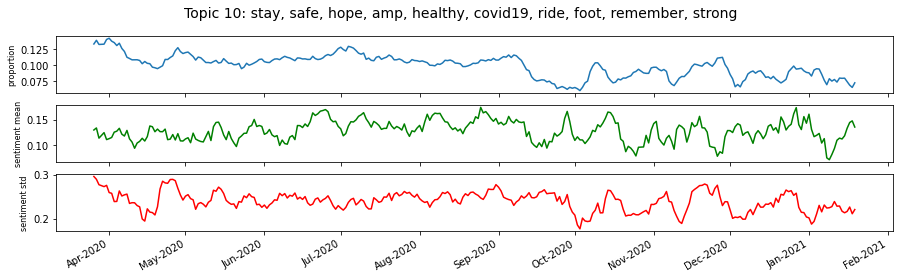

/Users/joey/.conda/envs/pytorch_playground/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joey/.conda/envs/pytorch_playground/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


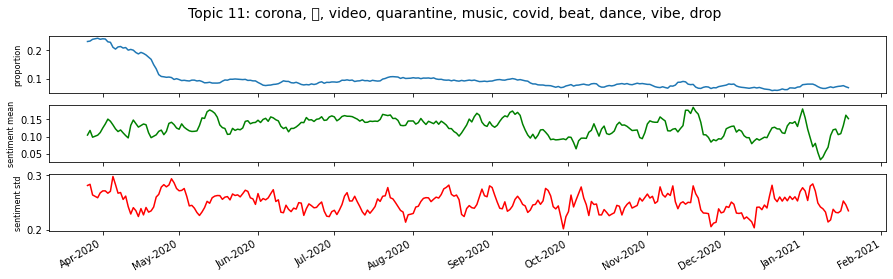

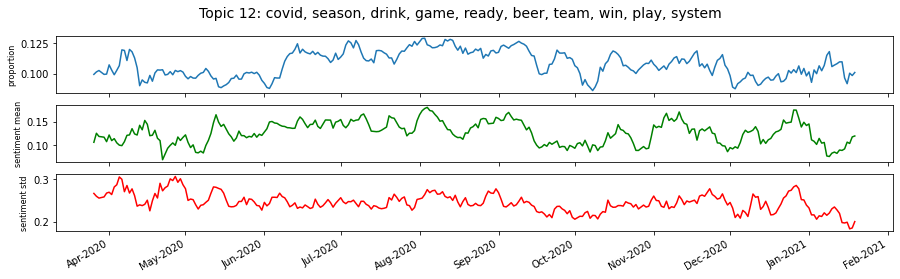

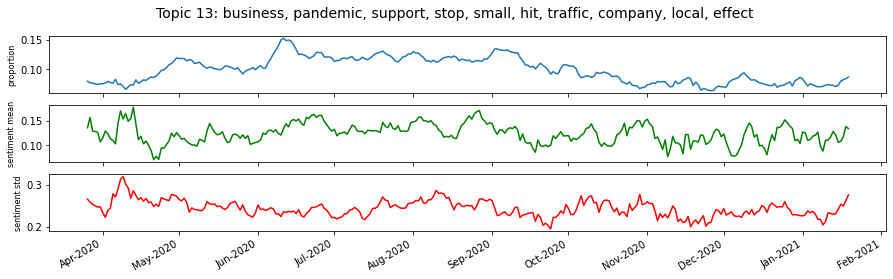

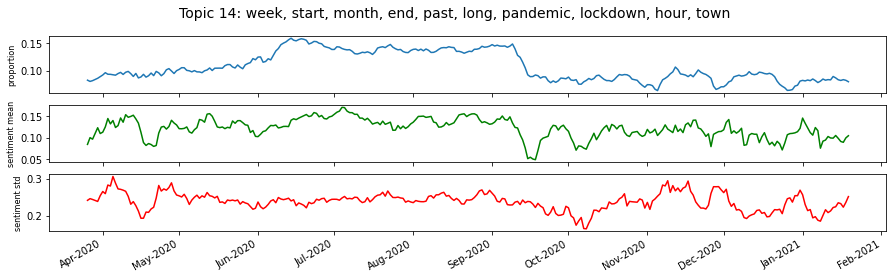

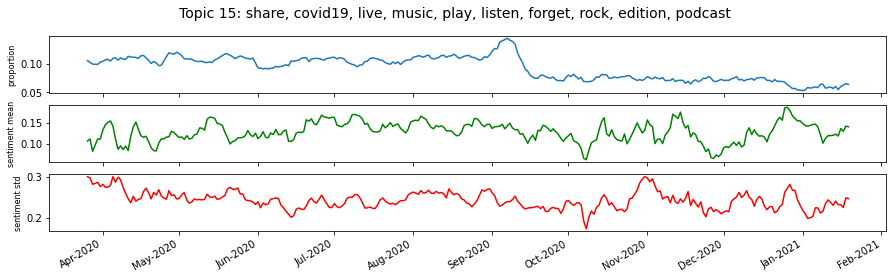

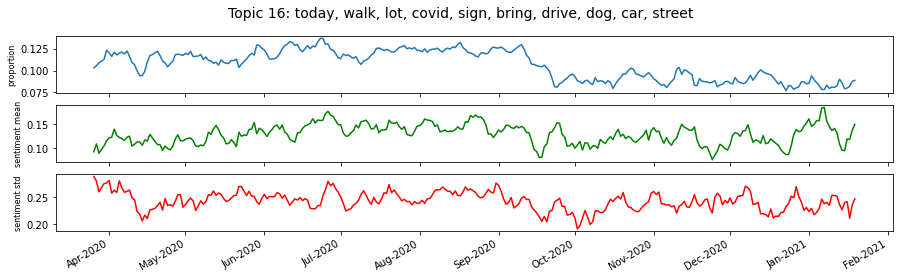

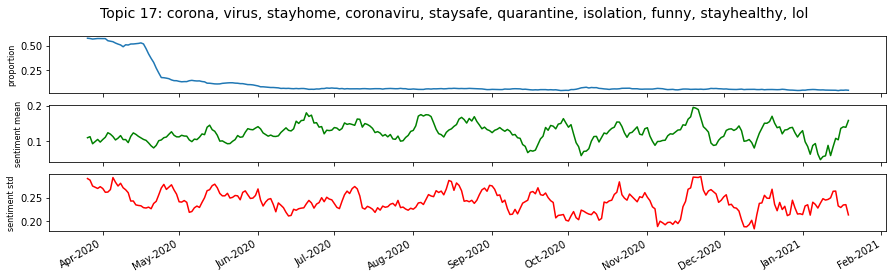

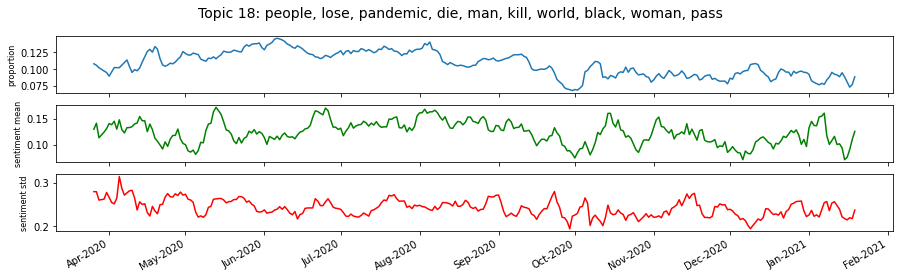

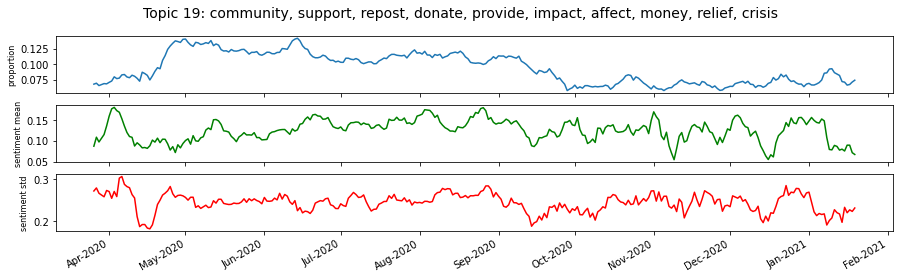

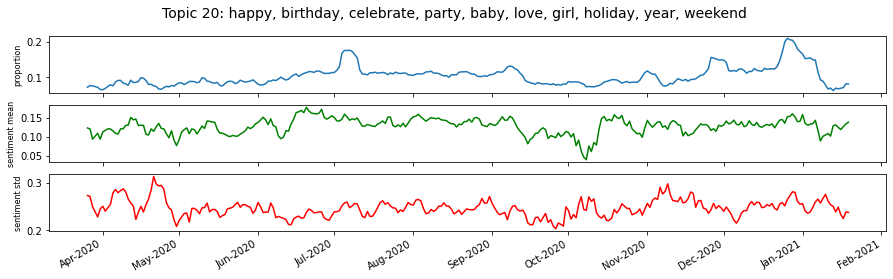

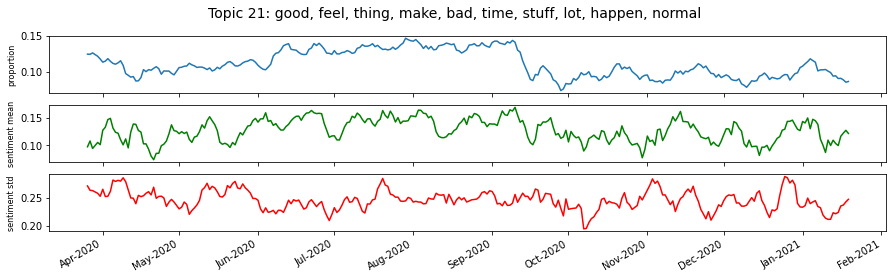

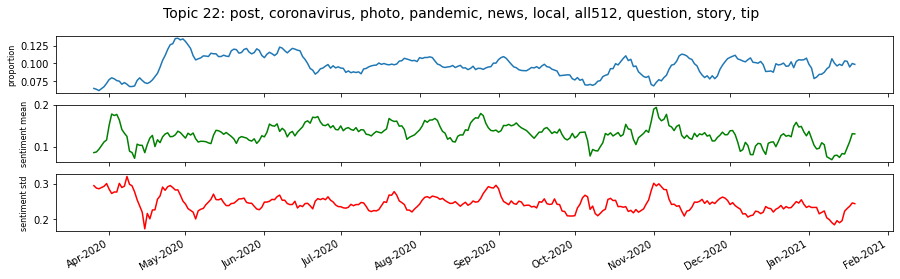

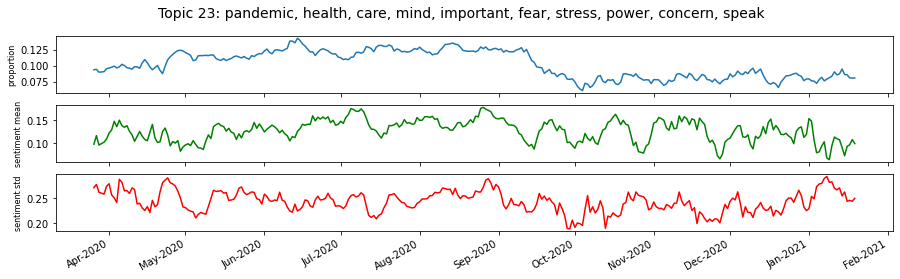

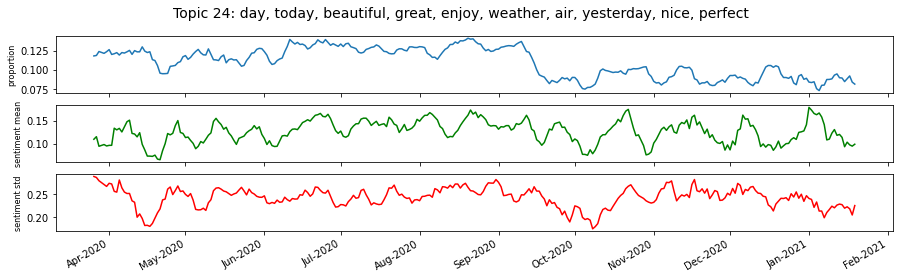

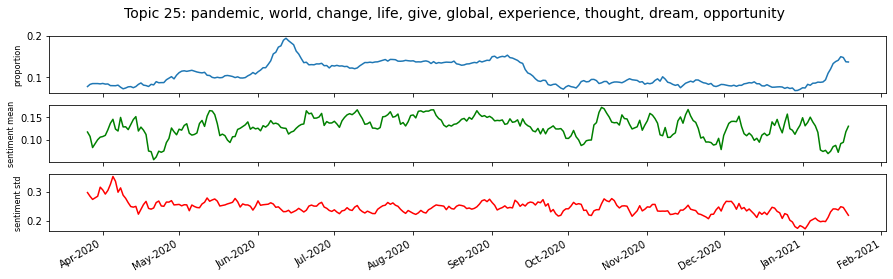

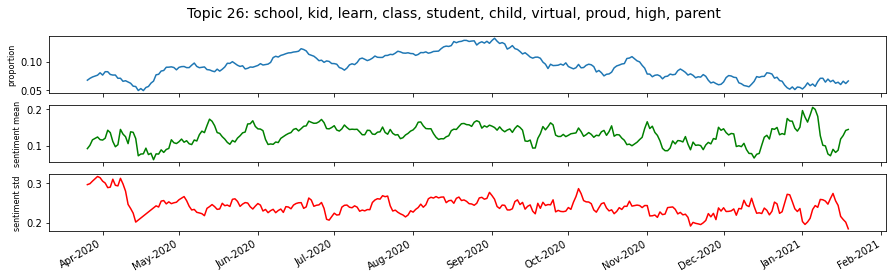

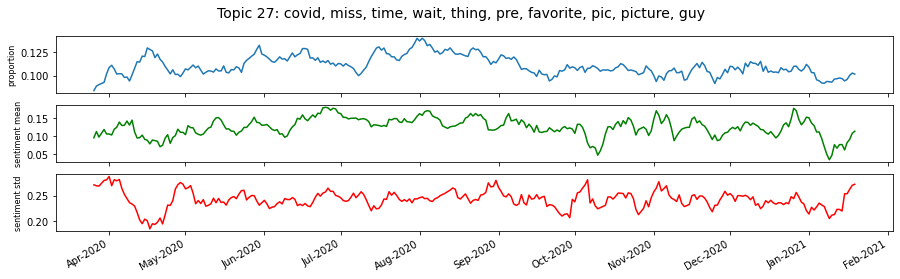

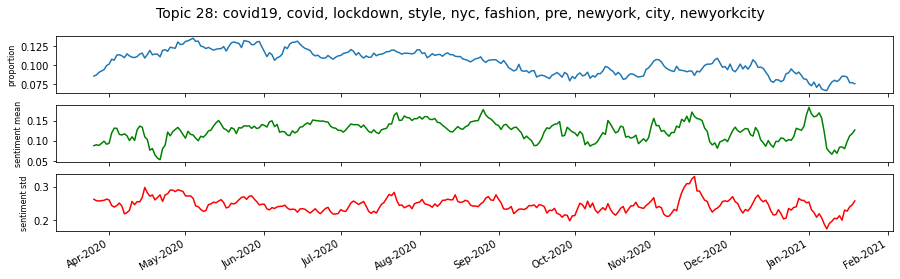

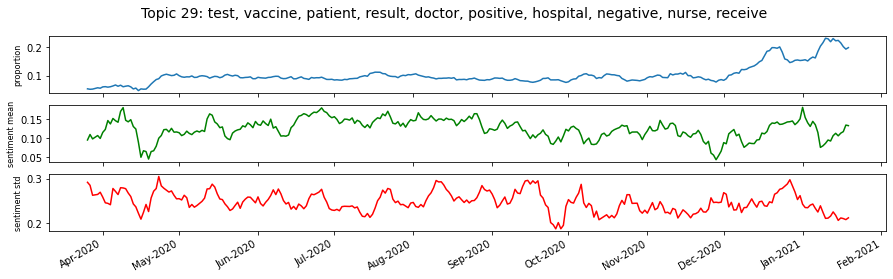

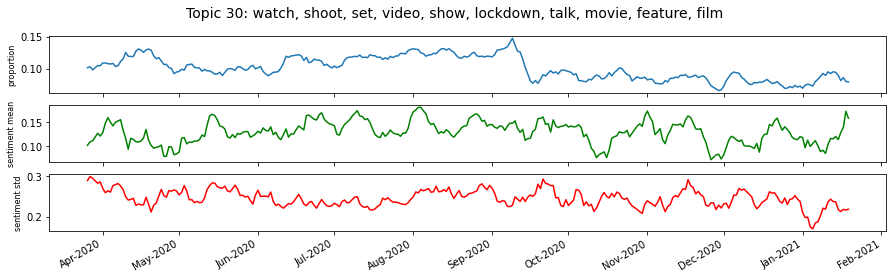

/Users/joey/.conda/envs/pytorch_playground/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127997 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joey/.conda/envs/pytorch_playground/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 129318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joey/.conda/envs/pytorch_playground/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joey/.conda/envs/pytorch_playground/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 127997 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/joey/.conda/envs/pytorch_playground/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 129318 missing from current font.
  font.set_text(s, 

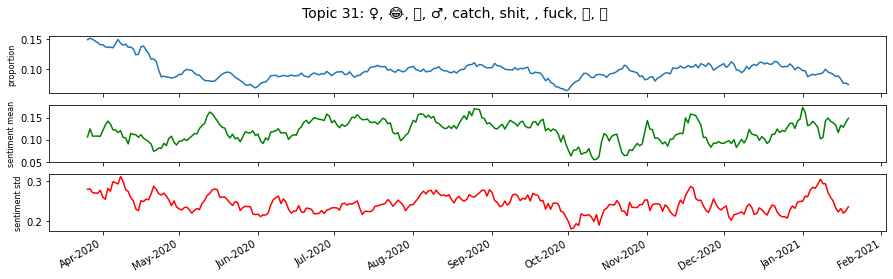

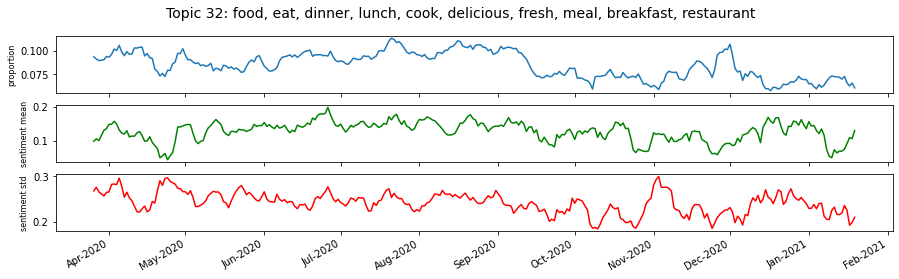

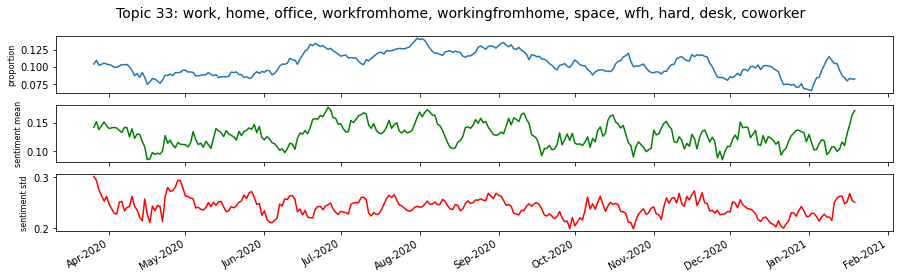

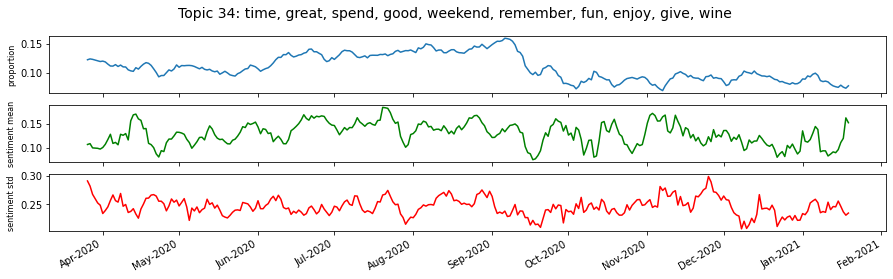

/Users/joey/.conda/envs/pytorch_playground/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joey/.conda/envs/pytorch_playground/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127997 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joey/.conda/envs/pytorch_playground/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joey/.conda/envs/pytorch_playground/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joey/.conda/envs/pytorch_playground/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s

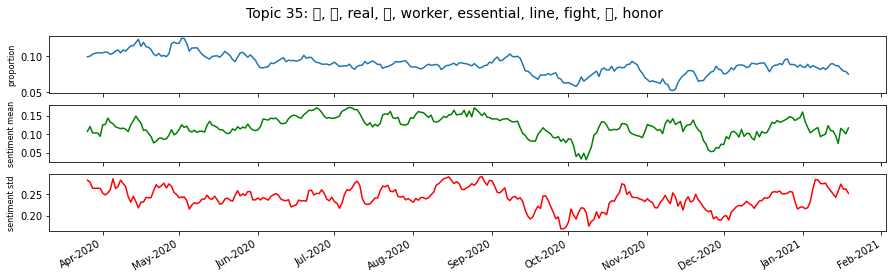

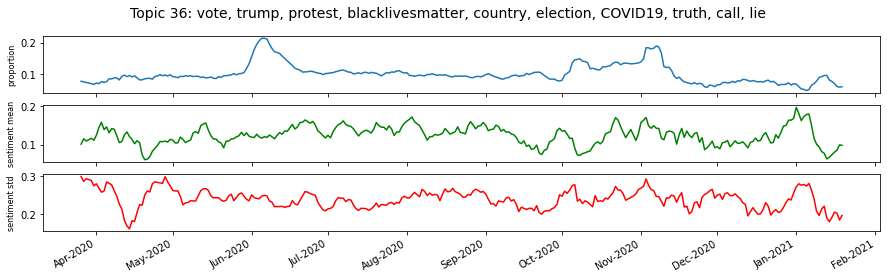

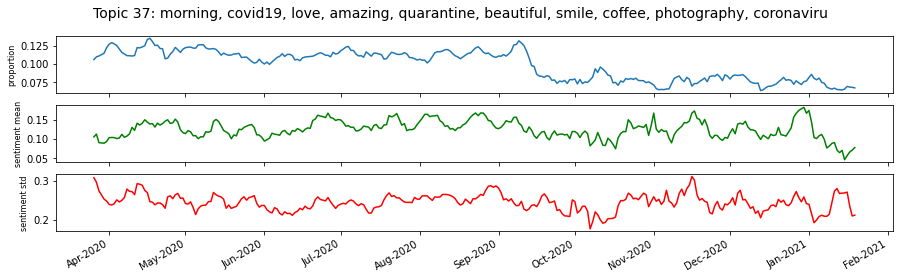

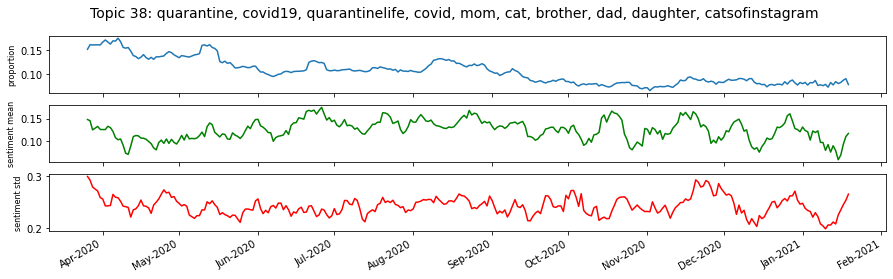

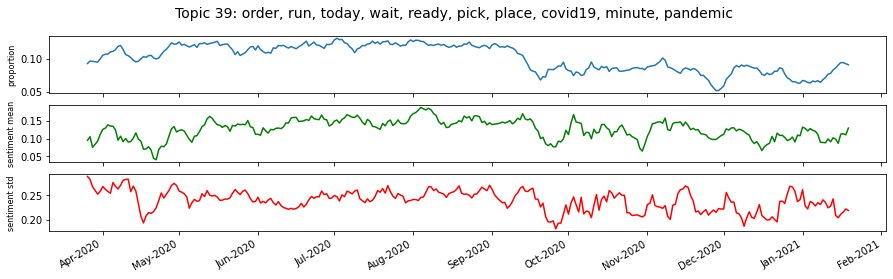

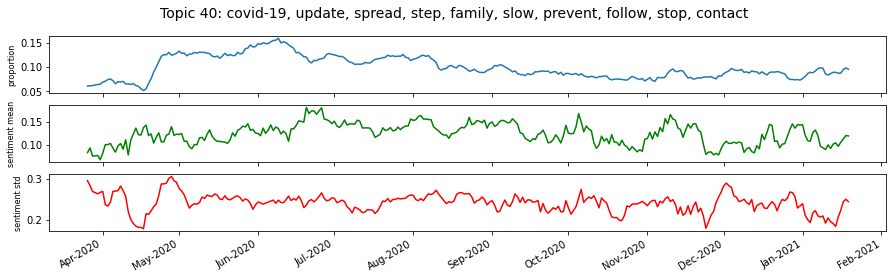

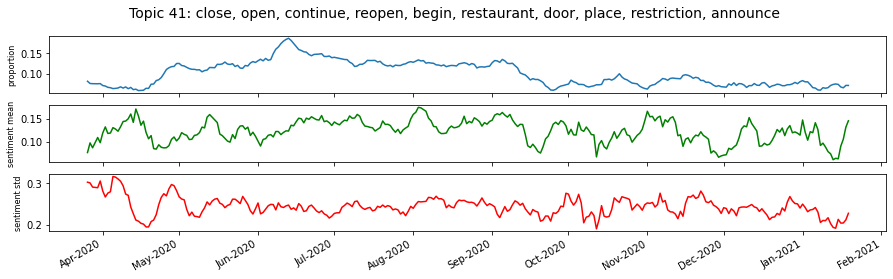

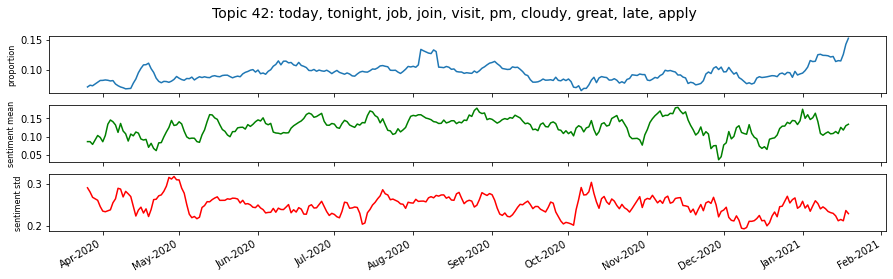

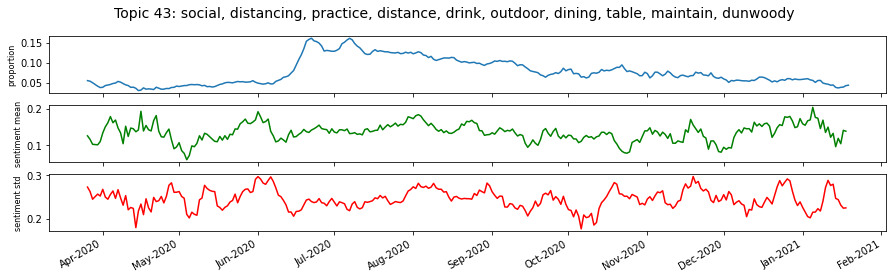

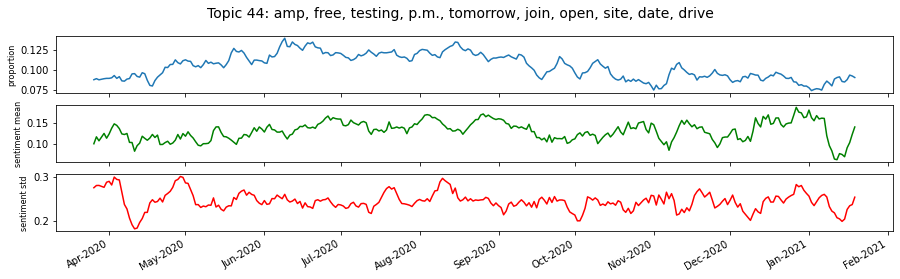

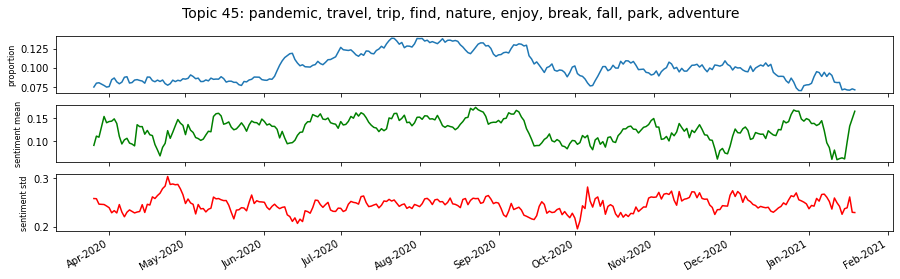

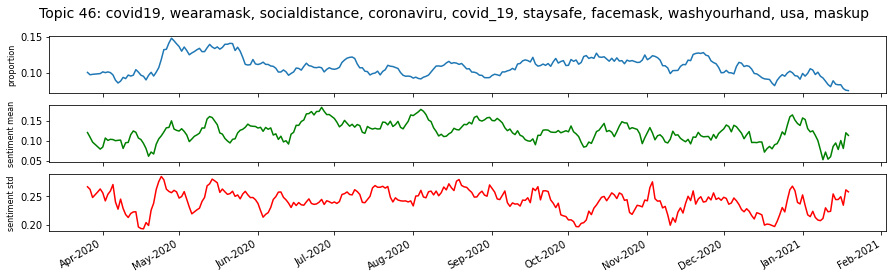

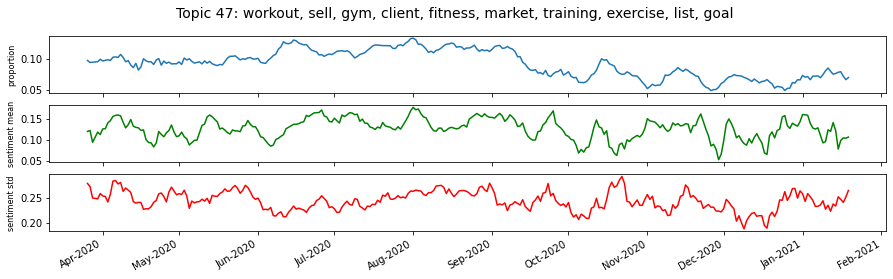

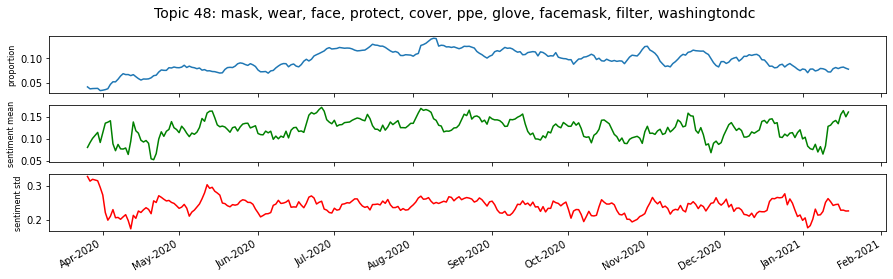

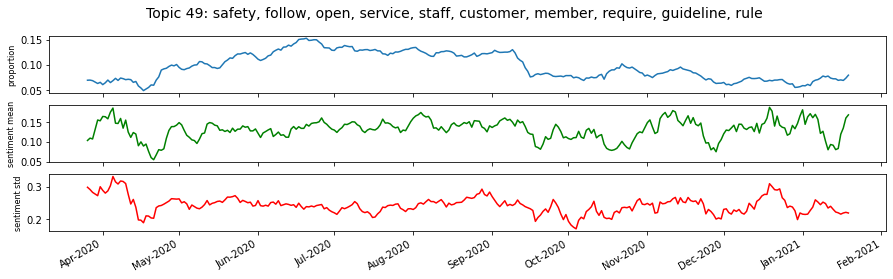

In [52]:
for topic in topic_columns:
    plot_topic(data, topic, rolling=7)